In [1]:
pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 kB 4.7 MB/s eta 0:00:00


In [2]:
from scipy.stats import chisquare, chi2_contingency
import numpy as np
import dask.dataframe as dd
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [28]:
df = dd.read_csv('/content/drive/MyDrive/microsoft_projData/new_train_sample.csv', dtype={'ActionGranular': 'object',
       'ActionGrouped': 'object',
       'AntispamDirection': 'object',
       'ResourceType': 'object',
       'Roles': 'object',
       'ThreatFamily': 'object'})

In [29]:
df = df.drop(['Unnamed: 0', 'Id', 'MitreTechniques','ActionGrouped', 'ActionGranular', 'EmailClusterId', 'ThreatFamily', 'ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'], axis=1)

In [30]:
df = df.sample(frac=0.001, random_state=42)

In [7]:
len(df)

4750

In [31]:
df['Timestamp'] = df['Timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2})', expand=False)

In [32]:
df['Timestamp'] = dd.to_datetime(df['Timestamp'], format='%Y-%m-%d')

In [33]:
df['Day_of_Week'] = df['Timestamp'].dt.day_name()

In [34]:
df = df.drop('Timestamp', axis=1)

In [35]:
df = df.compute()

In [9]:
# df.shape

In [10]:
# df_cat = df.apply(lambda x: pd.factorize(x)[0] + 1)

In [11]:
# df.apply(lambda x: pd.factorize(x)[0] + 1).corr(method='pearson', min_periods=1)

In [36]:
df.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Day_of_Week'],
      dtype='object')

In [37]:
col = df.pop('IncidentGrade')
df.insert(len(df.columns), 'IncidentGrade', col)

In [38]:
factors_paired = [(i,j) for i in df.columns.values for j in df.columns.values]

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(df[f[0]], df[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)

#The p_values list needs to be reshaped into a 34x34 matrix so that it matches the shape of the DataFrame
p_values = np.array(p_values).reshape((34,34))

#Use the reshaped p_values to create the DataFrame
chi2 = pd.DataFrame(p_values, index=df.columns.values, columns=df.columns.values)

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

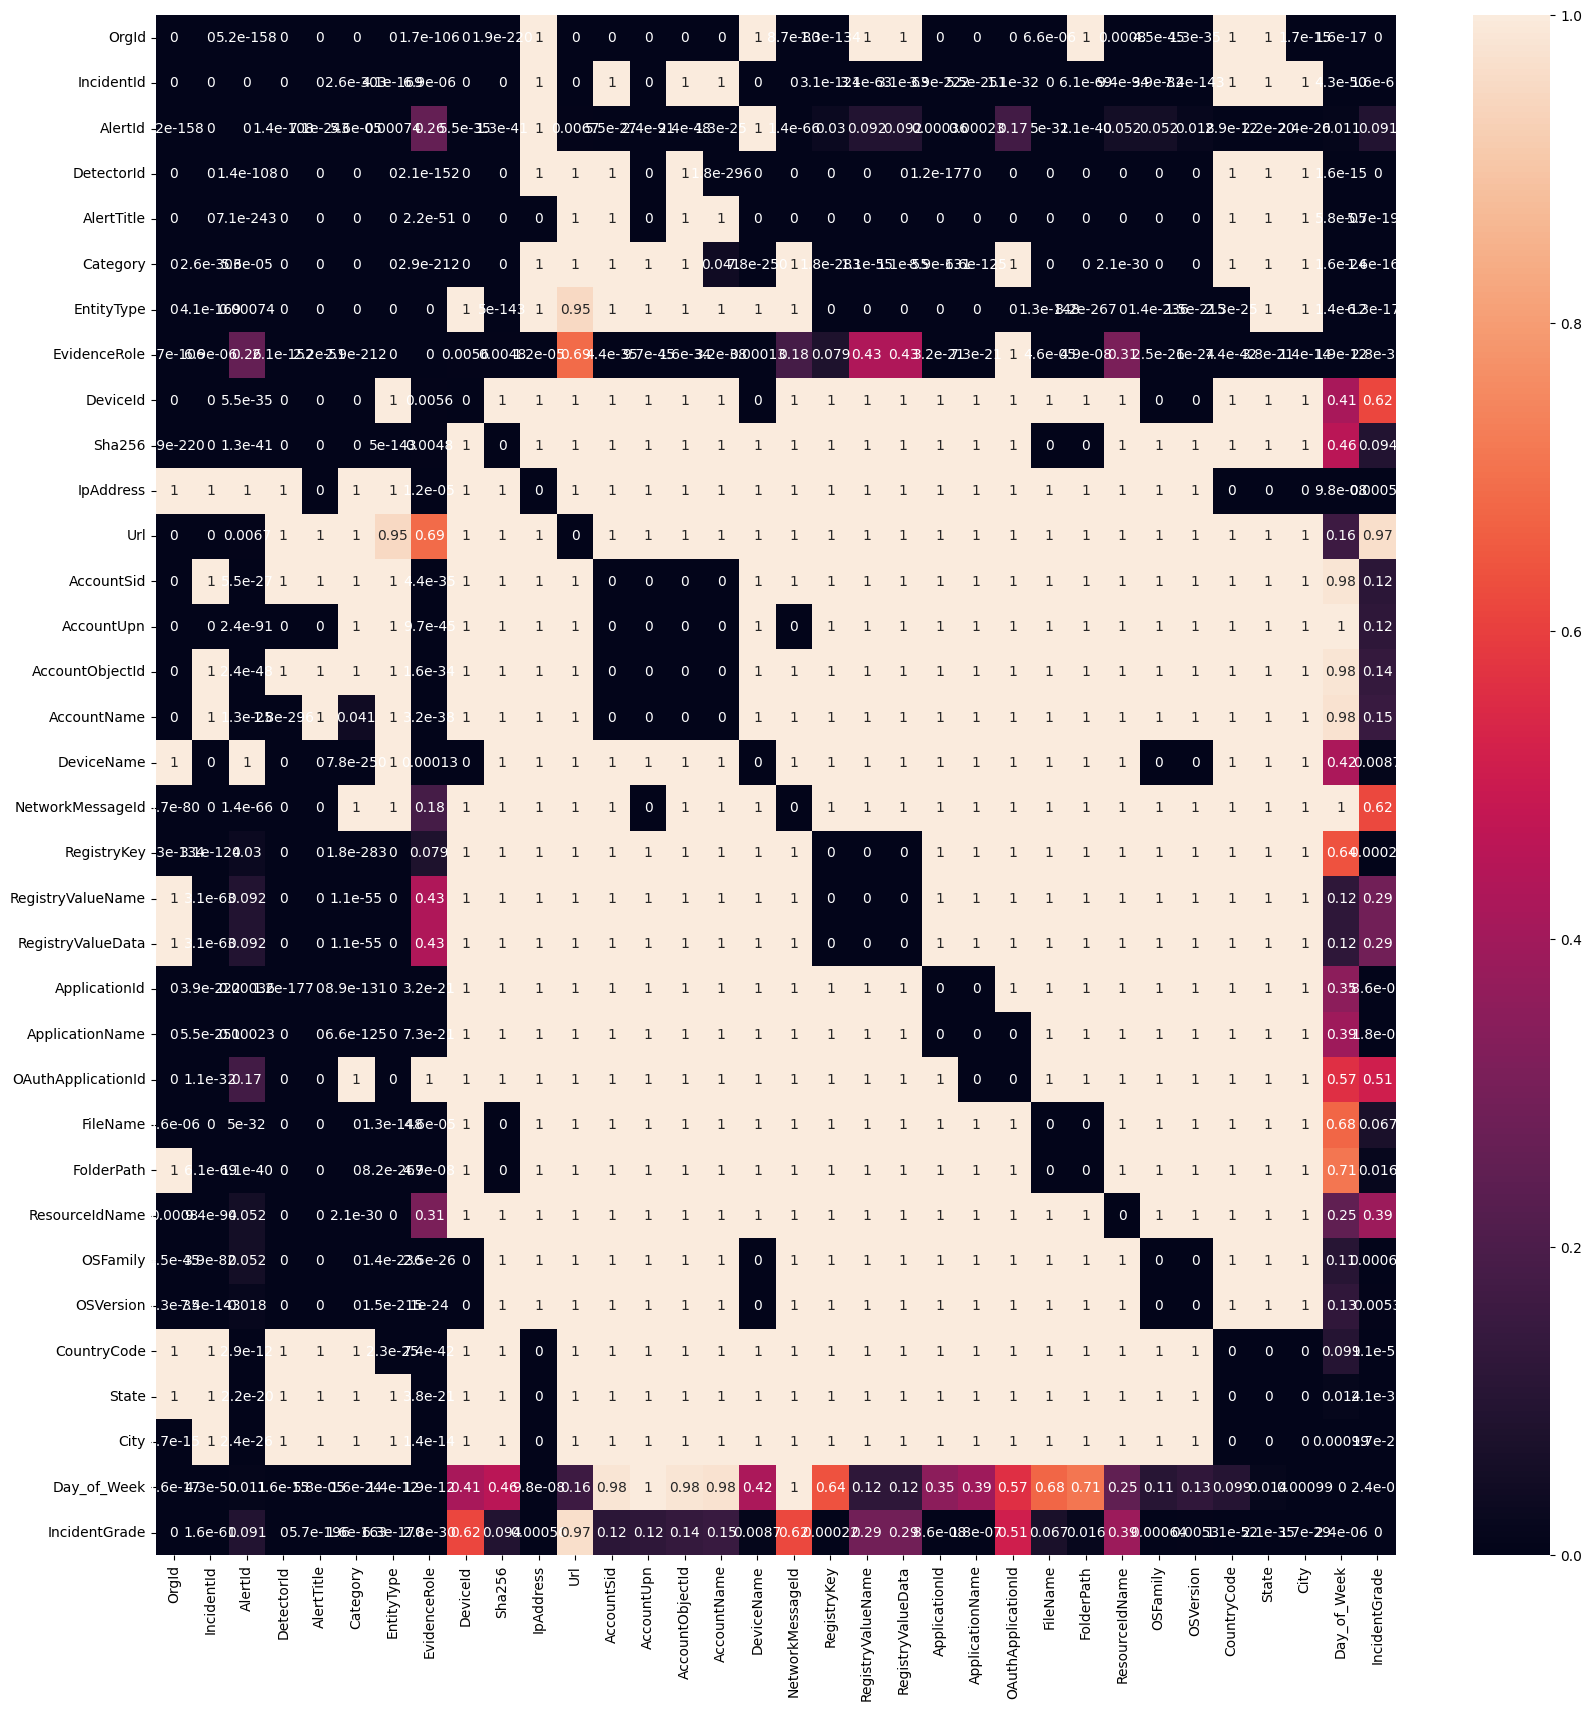

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(chi2, annot=True)
plt.show()

In [41]:
df.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'EntityType', 'EvidenceRole', 'DeviceId', 'Sha256',
       'IpAddress', 'Url', 'AccountSid', 'AccountUpn', 'AccountObjectId',
       'AccountName', 'DeviceName', 'NetworkMessageId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'FileName', 'FolderPath',
       'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode', 'State',
       'City', 'Day_of_Week', 'IncidentGrade'],
      dtype='object')

In [42]:
df = df.drop(['AlertId','DeviceId', 'Url','AccountSid', 'AccountUpn', 'AccountObjectId','AccountName','NetworkMessageId', 'RegistryValueName','RegistryValueData','OAuthApplicationId', 'ResourceIdName' ], axis=1)

In [44]:
df = df.drop(['Sha256'], axis=1)

In [43]:
len(df.columns)

22